In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import nest_asyncio
from IrisAnalysis import IrisAnalysis
import matplotlib.pyplot as plt

nest_asyncio.apply()

In [2]:
ia = IrisAnalysis(trait="sepal length (cm)")
ia.compile(s_intercept=10, s_species_effect=10, s_residual=10)
summary, posteriors, R2 = ia.sample(
    data=ia.stan_data,
    s_intercept=10,
    s_species_effect=10,
    s_residual=10,
    warmup=100,
    samples=100,
    chains=4,
    adapt_delta=0.8,
)

R2

12:31:32 - cmdstanpy - INFO - compiling stan file /tmp/tmpxcmkv__w.stan to exe file /tmp/tmpxcmkv__w
12:31:46 - cmdstanpy - INFO - compiled model executable: /tmp/tmpxcmkv__w
12:31:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:31:46 - cmdstanpy - INFO - CmdStan done processing.
12:31:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'tmpxcmkv__w.stan', line 32, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


np.float64(0.6186599017712598)

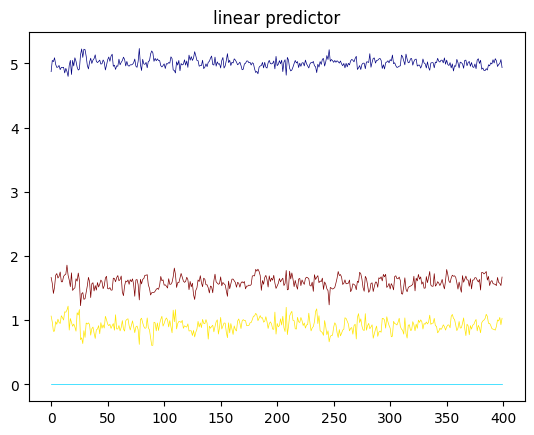

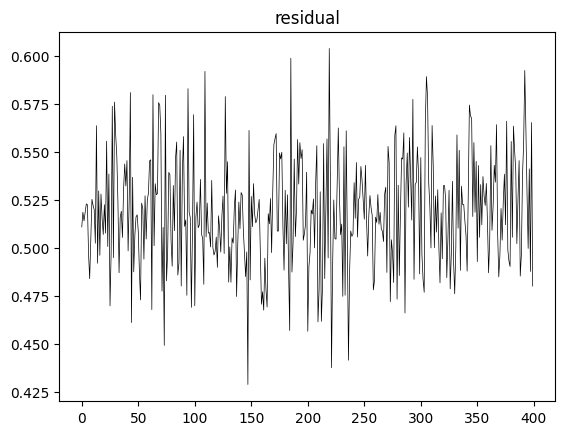

In [3]:
cmap = plt.get_cmap("jet")
colors = [cmap(x / 3) for x in range(4)]

plt.plot(posteriors["intercept"], color = colors[0], linewidth = .5)

for i in range(3):
    plt.plot(posteriors["species_effects"][:,i], color = colors[1 + i], linewidth = .5)
plt.title("linear predictor")
plt.show()

plt.plot(posteriors["residual"], color = "black", linewidth = .5)
plt.title("residual")
plt.show()

In [4]:
ia = IrisAnalysis(trait="sepal length (cm)")

results = ia.cross_val(
    k=5,
    s_intercept=10,
    s_species_effect=10,
    s_residual=10,
    warmup=200,
    samples=300,
    chains=4,
    adapt_delta=0.8,
)

12:31:47 - cmdstanpy - INFO - compiling stan file /tmp/tmph2ci8we9.stan to exe file /tmp/tmph2ci8we9
12:32:02 - cmdstanpy - INFO - compiled model executable: /tmp/tmph2ci8we9
12:32:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:32:02 - cmdstanpy - INFO - CmdStan done processing.
12:32:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'tmph2ci8we9.stan', line 32, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


12:32:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:32:02 - cmdstanpy - INFO - CmdStan done processing.
12:32:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'tmph2ci8we9.stan', line 32, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


12:32:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:32:02 - cmdstanpy - INFO - CmdStan done processing.
12:32:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'tmph2ci8we9.stan', line 32, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


12:32:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:32:03 - cmdstanpy - INFO - CmdStan done processing.
12:32:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'tmph2ci8we9.stan', line 32, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


12:32:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:32:03 - cmdstanpy - INFO - CmdStan done processing.
12:32:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'tmph2ci8we9.stan', line 32, column 4 to column 29)
Consider re-running with show_console=True if the above output is unclear!


In [5]:
for i, res in enumerate(results):
    print(f"== fold {i} ==\nfit: {res['R2_fit']}\npred: {res['R2_pred']}\n")

== fold 0 ==
fit: 0.6287904229126708
pred: 0.5541047805574761

== fold 1 ==
fit: 0.6100496434941702
pred: 0.6594197933852806

== fold 2 ==
fit: 0.6067990157591747
pred: 0.6640790900633851

== fold 3 ==
fit: 0.6226241769389838
pred: 0.6018139327880889

== fold 4 ==
fit: 0.6296847052405192
pred: 0.5796249007075852

